In [39]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns



**Q4. Using the pandas read_csv() function, read the GDP dataset into your notebook as a DataFrame called gdp_df.** 

**Q4: Inspect the last 10 rows.**

In [53]:
!cd

C:\Users\dhans\Documents\DataScience\Program\un-exploration-dhansiv-stack


In [55]:
gdp_df = pd.read_csv("data/gdp_per_capita.csv")
print(gdp_df)

     Country  or Area  Year        Value  Value Footnotes
0         Afghanistan  2023  1992.424394              NaN
1         Afghanistan  2022  1981.710168              NaN
2         Afghanistan  2021  2144.166570              NaN
3         Afghanistan  2020  2769.685745              NaN
4         Afghanistan  2019  2927.245144              NaN
...               ...   ...          ...              ...
8214         Zimbabwe  1994  3965.730986              NaN
8215         Zimbabwe  1993  3634.750494              NaN
8216         Zimbabwe  1992  3649.891947              NaN
8217         Zimbabwe  1991  4126.405247              NaN
8218         Zimbabwe  1990  4013.299059              NaN

[8219 rows x 4 columns]


In [56]:
gdp_df.tail(10)

,Country or Area,Year,Value,Value Footnotes
8209,Zimbabwe,1999,4238.195198,NaN
8210,Zimbabwe,1998,4342.858177,NaN
8211,Zimbabwe,1997,4304.406272,NaN
8212,Zimbabwe,1996,4271.479930,NaN
8213,Zimbabwe,1995,3935.280057,NaN
8214,Zimbabwe,1994,3965.730986,NaN
8215,Zimbabwe,1993,3634.750494,NaN
8216,Zimbabwe,1992,3649.891947,NaN
8217,Zimbabwe,1991,4126.405247,NaN
8218,Zimbabwe,1990,4013.299059,NaN


**Q4: Inspect the first 10 rows.**

In [57]:
gdp_df.head(10)

,Country or Area,Year,Value,Value Footnotes
0,Afghanistan,2023,1992.424394,NaN
1,Afghanistan,2022,1981.710168,NaN
2,Afghanistan,2021,2144.166570,NaN
3,Afghanistan,2020,2769.685745,NaN
4,Afghanistan,2019,2927.245144,NaN
5,Afghanistan,2018,2902.392113,NaN
6,Afghanistan,2017,2952.998916,NaN
7,Afghanistan,2016,2958.785399,NaN
8,Afghanistan,2015,2967.692067,NaN
9,Afghanistan,2014,3017.942544,NaN


**Q5: Drop the 'Value Footnotes' column, and rename the remaining columns to 'Country', 'Year', and 'GDP_Per_Capita'.**

In [58]:
gdp_df = (gdp_df.drop("Value Footnotes", axis=1)
                    .rename(columns = {'Country  or Area': 'Country', 'Value': 'GDP_Per_Capita'})
)
gdp_df.head(2)



,Country,Year,GDP_Per_Capita
0,Afghanistan,2023,1992.424394
1,Afghanistan,2022,1981.710168


**Q6: How many rows and columns does gdp_df have? What are the data types of its columns? If any of the columns are not the expected types, figure out why and fix it.**

In [59]:
num_rows, num_cols = gdp_df.shape
print(f"The DataFrame has {num_rows} rows and {num_cols} columns.")
print(gdp_df.dtypes)


The DataFrame has 8219 rows and 3 columns.
Country            object
Year                int64
GDP_Per_Capita    float64
dtype: object


**Q7: Which years are represented in this dataset? Take a look at the number of observations per year. What do you notice?**

**Comment**. I found that there is more than 200 observation for each year.

In [60]:
gdp_df['Year'].value_counts().sort_index()

Year
1990    233
1991    234
1992    234
1993    234
1994    235
1995    236
1996    236
1997    238
1998    238
1999    238
2000    240
2001    240
2002    241
2003    241
2004    241
2005    241
2006    242
2007    242
2008    244
2009    245
2010    245
2011    246
2012    246
2013    247
2014    247
2015    247
2016    247
2017    247
2018    247
2019    247
2020    247
2021    247
2022    246
2023    240
Name: count, dtype: int64

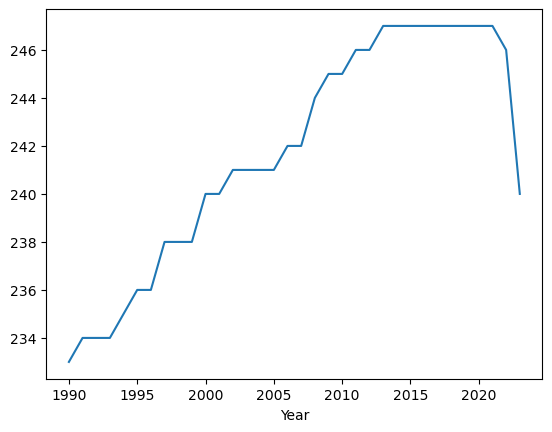

In [61]:
 gdp_df['Year'].value_counts().sort_index().plot();

**Q8:How many countries are represented in this dataset? Which countries are least represented in the dataset? Why do you think these countries have so few observations?**

**Comment**. I believe that their limited presence may be attributed to a poor economic status.

In [62]:
Num_obs_Country_counts = gdp_df.groupby("Country")["GDP_Per_Capita"].count().sort_values()
Least_obs_country = Num_obs_Country_counts[Num_obs_Country_counts<20]
print(Least_obs_country)

Country
Djibouti                     11
Turks and Caicos Islands     13
Sint Maarten (Dutch part)    15
Faroe Islands                16
Kosovo                       16
Cayman Islands               18
Name: GDP_Per_Capita, dtype: int64


**Q9: Create a new dataframe by subsetting gdp_df to just the year 2021. Call this new dataframe gdp_2021.**

In [63]:
gdp_2021 = gdp_df[gdp_df['Year'] == 2021]

**Q10: Use .describe() to find the summary statistics for GDP per capita in 2021.**

In [64]:
gdp_2021.head(2)

,Country,Year,GDP_Per_Capita
2,Afghanistan,2021,2144.166570
26,Africa Eastern and Southern,2021,3934.287267


In [65]:
gdp_2021['GDP_Per_Capita'].describe()

count       247.000000
mean      24478.517262
std       24601.525764
min         836.665571
25%        5996.532844
50%       15900.976580
75%       37298.776850
max      135379.291200
Name: GDP_Per_Capita, dtype: float64

**Q11: Create a histogram of GDP Per Capita numbers for 2021 (you may wish to adjust the number of bins for your histogram). How would you describe the shape of the distribution?**

**Comment**: The Histogram shows a non-uniform distribution of GDP_Per_Capita in 2021. Furthermore, it reveals that a very small percentage of countries are performing well economically, while the majority are under performing.

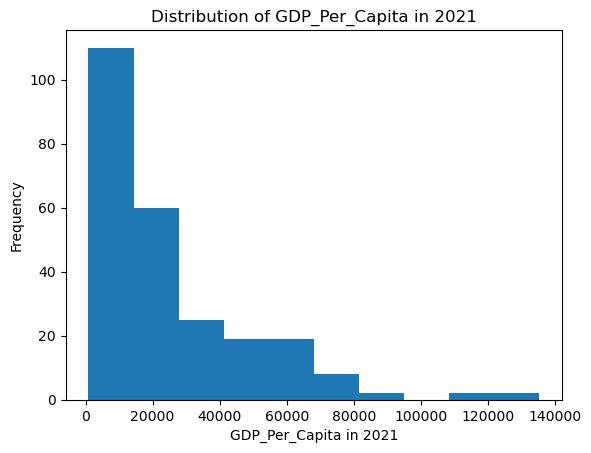

In [66]:
plt.hist(gdp_2021['GDP_Per_Capita'],bins=10)
plt.title('Distribution of GDP_Per_Capita in 2021')
plt.xlabel('GDP_Per_Capita in 2021')
plt.ylabel('Frequency')
plt.show()

**Q12. Find the top 5 counties and bottom 5 countries by GDP per capita in 2021.**

**Q12. Bottom 5 countries by GDP per capita in 2021.**

In [67]:
gdp_2021.nlargest(5, 'GDP_Per_Capita')

,Country,Year,GDP_Per_Capita
4425,Luxembourg,2021,135379.2912
6513,Singapore,2021,131864.0923
3492,Ireland,2021,118594.7469
6118,Qatar,2021,116832.5703
740,Bermuda,2021,92276.2346


**Q12. Bottom 5 countris by GDP_Per_Capita in 2021.**

In [68]:
gdp_2021.nsmallest(5, 'GDP_Per_Capita')

,Country,Year,GDP_Per_Capita
1045,Burundi,2021,836.665571
1301,Central African Republic,2021,1128.552380
1733,Dem. Rep. Congo,2021,1313.618218
6698,Somalia,2021,1392.464262
5132,Mozambique,2021,1457.235409


**Q13: Now, return to the full dataset, gdp_df. Pivot the data for 1990 and 2021 (using the pandas .pivot_table() method or another method) so that each row corresponds to a country, each column corresponds to a year, and the values in the table give the GDP_Per_Capita amount. Drop any rows that are missing values for either 1990 or 2021. Save the result to a dataframe named gdp_pivoted.**

In [69]:
gdp_filtered = gdp_df[gdp_df['Year'].isin([1990, 2021])]
gdp_pivoted = pd.pivot_table(
    gdp_filtered,
    index='Country',
    columns='Year',
    values='GDP_Per_Capita',
    dropna=True);     
gdp_pivoted.head(2)

Year,1990,2021
Country,,
Afghanistan,NaN,2144.166570
Africa Eastern and Southern,3386.85448,3934.287267


**Q14: Find the countries that had the top 3 largest GDP per capita figures for 2021. Create a seaborn FacetGrid showing the change in life expectancy over time for these three countries. Each individual figure in the facet grid will represent a single country.**

In [70]:
gdp_pivoted['Percent_Change'] = 100 * (gdp_pivoted[2021] - gdp_pivoted[1990]) / gdp_pivoted[1990]
gdp_pivoted.head(5)

Year,1990,2021,Percent_Change
Country,,,
Afghanistan,NaN,2144.166570,NaN
Africa Eastern and Southern,3386.854480,3934.287267,16.163458
Africa Western and Central,3299.401375,4698.926894,42.417559
Albania,5327.747458,16113.136520,202.438069
Algeria,11728.545730,14496.865470,23.603265


Q15: How many countries experienced a negative percent change in GDP per capita from 1990 to 2021?

In [71]:
negative_change_count = (gdp_pivoted['Percent_Change'] < 0).sum()
print(f'Number of countries with negative percent change in GDP per capita from 1990 to 2021: {negative_change_count}')

Number of countries with negative percent change in GDP per capita from 1990 to 2021: 23


**Q16: Which country had the highest % change in GDP per capita? Create a line plot showing this country's GDP per capita for all years from 1990 to 2018. Create another showing the country with the second highest % change in GDP. How do the trends in these countries compare?
Bonus: Put both line charts on the same plot.**

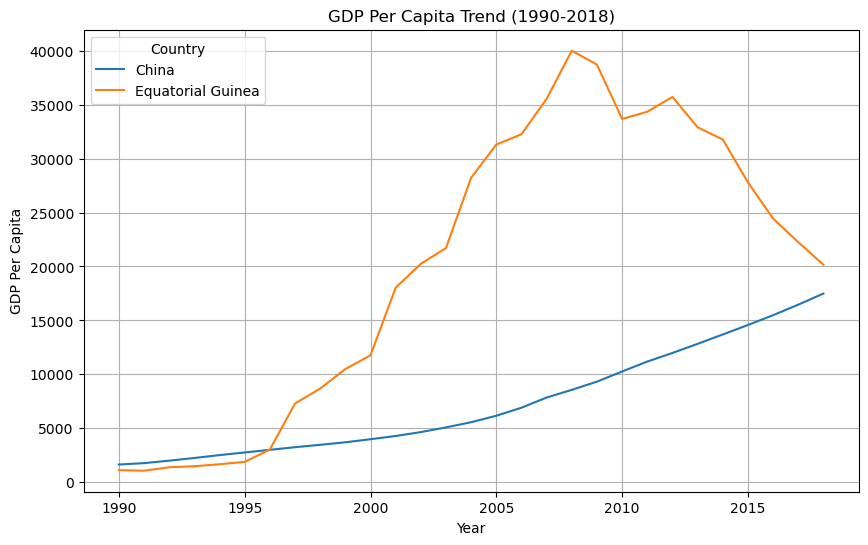

In [72]:
top_countries = gdp_pivoted.nlargest(2, 'Percent_Change').index

gdp_plot_df = gdp_df[
    (gdp_df['Country'].isin(top_countries)) & (gdp_df['Year']).between(1990, 2018)].copy()

plt.figure(figsize=(10, 6))

sns.lineplot(
    data=gdp_plot_df,
    x='Year',
    y='GDP_Per_Capita',
    hue='Country');   
    
plt.title(f'GDP Per Capita Trend (1990-2018)')
plt.xlabel('Year')
plt.ylabel('GDP Per Capita')
plt.grid(True)
plt.legend(title='Country')
plt.show()


**Q17: Read in continents.csv contained in the data folder into a new dataframe called continents. We will be using this dataframe to add a new column to our dataset.**

In [73]:
continents = pd.read_csv("data/continents.csv")
continents.head(2)

,Continent,Country
0,Asia,Afghanistan
1,Europe,Albania


**Q18: Merge gdp_df and continents. Keep only the countries that appear in both data frames. Save the result back to gdp_df.**

In [74]:
gdp_df = pd.merge(
    left= gdp_df,
    right= continents,
    how='inner',
    validate = 'many_to_one'
);
gdp_df.head(5)

,Country,Year,GDP_Per_Capita,Continent
0,Afghanistan,2023,1992.424394,Asia
1,Afghanistan,2022,1981.710168,Asia
2,Afghanistan,2021,2144.166570,Asia
3,Afghanistan,2020,2769.685745,Asia
4,Afghanistan,2019,2927.245144,Asia


**Q19: Determine the number of countries per continent.** 

In [75]:
gdp_df.drop_duplicates(subset = ['Country', 'Continent'])['Continent'].value_counts().sort_index()

Continent
Africa           50
Asia             41
Europe           45
North America    26
Oceania          14
South America    11
Name: count, dtype: int64

**Q19: Create a bar chart showing the number of countries per continent.**

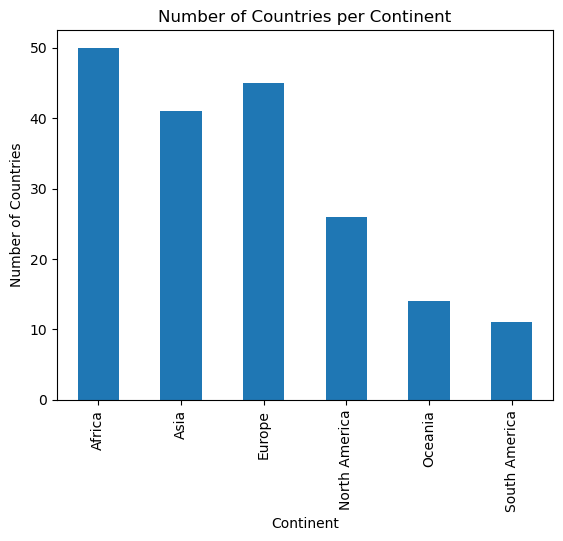

In [76]:
gdp_df.drop_duplicates(subset = ['Country', 'Continent'])['Continent'].value_counts().sort_index().plot(kind='bar')
plt.xlabel('Continent')
plt.ylabel('Number of Countries')
plt.title('Number of Countries per Continent')
plt.show()


**Q20: Create a seaborn boxplot showing GDP per capita in 2021 split out by continent. What do you notice?**

**Comment**: "I noticed that life expectancy is typically right-skewed in most countries, except for those in Europe. Furthermore, the data from South America revealed no outliers when compared to other regions.

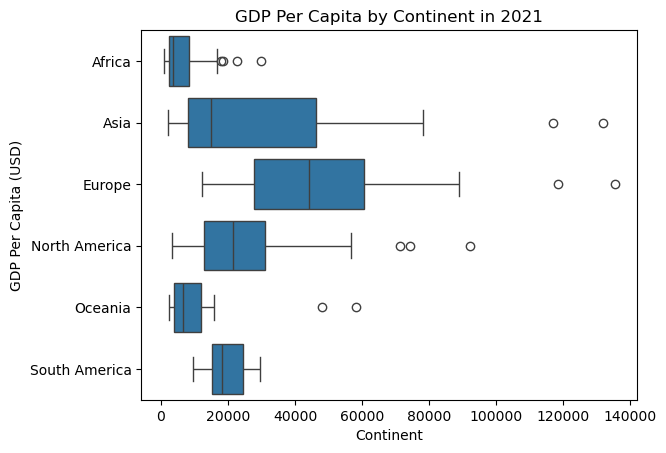

In [77]:
sns.boxplot(data = gdp_df[gdp_df['Year'] == 2021].sort_values('Continent'), x='GDP_Per_Capita', y='Continent');
plt.title('GDP Per Capita by Continent in 2021')
plt.xlabel('Continent')
plt.ylabel('GDP Per Capita (USD)')
plt.show()

**Q21: Download the full csv containing Life expectancy at birth, total (years) from https://data.worldbank.org/indicator/SP.DYN.LE00.IN?name_desc=false. Read this data into a DataFrame named life_expectancy. Note: When reading this dataset it, you may encounter an error. Modify your read_csv call to correct this without modifying the original csv file.**

In [78]:
life_expectancy = pd.read_csv('data/API_SP.DYN.LE00.IN_DS2_en_csv_v2_22997.csv', skiprows=4)
life_expectancy.head(2)

,Country Name,Country Code,Indicator Name,Indicator Code,1960,1961,1962,1963,1964,1965,...,2016,2017,2018,2019,2020,2021,2022,2023,2024,Unnamed: 69
0,Aruba,ABW,"Life expectancy at birth, total (years)",SP.DYN.LE00.IN,64.049000,64.215000,64.60200,64.944000,65.303000,65.615000,...,75.540000,75.620000,75.880000,76.019000,75.406000,73.655000,76.22600,76.353000,NaN,NaN
1,Africa Eastern and Southern,AFE,"Life expectancy at birth, total (years)",SP.DYN.LE00.IN,44.169658,44.468838,44.87789,45.160583,45.535695,45.770723,...,62.167981,62.591275,63.330691,63.857261,63.766484,62.979999,64.48702,65.146291,NaN,NaN


**Q22: Drop the Country Code, Indicator Name, and Indicator Code columns. Then use .melt() to convert your data from wide to long. That is, instead of having one row per country and multiple colums per year, we want to have multiple rows per country and a single column for year. After melting, rename the columns to Country, Year, and Life_Expectancy.**

In [79]:
life_expectancy = (
    life_expectancy
                   .drop(columns=['Country Code', 'Indicator Name', 'Indicator Code', 'Unnamed: 69'])
                   .melt(id_vars='Country Name', var_name='Year', value_name='Life_Expectancy')
                   .rename(columns={'Country Name': 'Country'})
)
life_expectancy.head(5)

,Country,Year,Life_Expectancy
0,Aruba,1960,64.049000
1,Africa Eastern and Southern,1960,44.169658
2,Afghanistan,1960,32.799000
3,Africa Western and Central,1960,37.779636
4,Angola,1960,37.933000


**Q23: What was the first country with a life expectancy to exceed 80?**

In [80]:
first_country = life_expectancy.loc[life_expectancy['Life_Expectancy'] >= 80].iloc[0]['Country']
print(f"The first country with a life expectancy to exceed 80 was {first_country}.")


The first country with a life expectancy to exceed 80 was Monaco.


**Q24: Merge gdp_df and life_expectancy, keeping all countries and years that appear in both DataFrames. Save the result to a new DataFrame named gdp_le. If you get any errors in doing this, read them carefully and correct them. Look at the first five rows of your new data frame to confirm it merged correctly. Also, check the last five rows to make sure the data is clean and as expected.**

In [81]:
life_expectancy['Year'] = pd.to_numeric(life_expectancy['Year'], errors='coerce')

In [82]:
life_expectancy.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17290 entries, 0 to 17289
Data columns (total 3 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Country          17290 non-null  object 
 1   Year             17290 non-null  int64  
 2   Life_Expectancy  16926 non-null  float64
dtypes: float64(1), int64(1), object(1)
memory usage: 405.4+ KB


In [83]:
gdp_le = pd.merge(left = gdp_df, 
                  right = life_expectancy, 
                  validate='one_to_one',
                  );
gdp_le.head(5)

,Country,Year,GDP_Per_Capita,Continent,Life_Expectancy
0,Afghanistan,2023,1992.424394,Asia,66.035
1,Afghanistan,2022,1981.710168,Asia,65.617
2,Afghanistan,2021,2144.166570,Asia,60.417
3,Afghanistan,2020,2769.685745,Asia,61.454
4,Afghanistan,2019,2927.245144,Asia,62.941


**Q25: Create a new DataFrame, named gdp_le_2021 by extracting data for the year 2021 from gdp_le. How many countries have a life expectancy of at least 80 in 2021?**

In [84]:
gdp_le_2021 = gdp_le[gdp_le['Year']==2021].copy()
gdp_le_2021_least = gdp_le[gdp_le['Life_Expectancy']>=80]['Country'].value_counts()
gdp_le_2021_least

Country
Andorra                 30
Japan                   28
Hong Kong SAR, China    27
San Marino              24
Macao SAR, China        24
Iceland                 23
Switzerland             23
Italy                   22
Australia               21
Sweden                  21
Israel                  20
France                  20
Norway                  19
United Arab Emirates    19
Spain                   19
Canada                  19
Singapore               18
New Zealand             18
Austria                 17
Netherlands             17
Ireland                 16
Luxembourg              16
Belgium                 15
United Kingdom          15
Malta                   15
Cyprus                  15
Greece                  15
Finland                 13
Germany                 13
Portugal                13
Qatar                   12
Denmark                 12
Slovenia                12
Bermuda                 11
Bahrain                  8
Costa Rica               6
Chile               

**Q26. Find the countries that had the top 3 largest GDP per capita figures for 2021. Create a seaborn FacetGrid showing the change in life expectancy over time for these three countries. Each individual figure in the facet grid will represent a single country.**

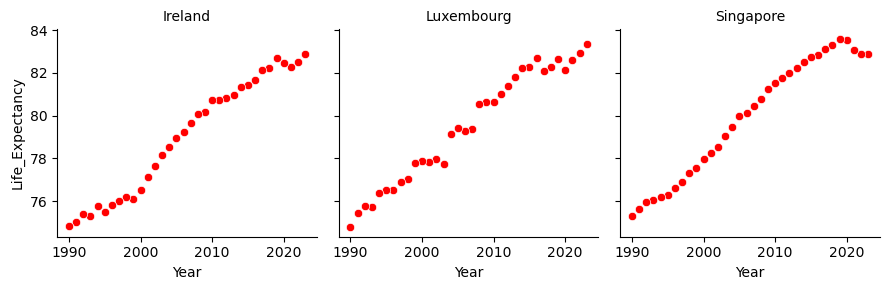

In [85]:
top_3_countries = gdp_le_2021.nlargest(3, 'GDP_Per_Capita')['Country'].tolist()
g = sns.FacetGrid(gdp_le[gdp_le['Country'].isin(top_3_countries)], col='Country')
g.map(sns.scatterplot, 'Year', 'Life_Expectancy', color='red', marker='o')
g.set_titles(col_template="{col_name}")
g.set_axis_labels("Year", "Life_Expectancy")
plt.show()

**Q27: Create a scatter plot of Life Expectancy vs GDP per Capita for the year 2021. What do you notice?**

**Comment**: There is a positive correlation between GDP per capita and life expectancy; as GDP per capita rises, life expectancy tends to increase as well.



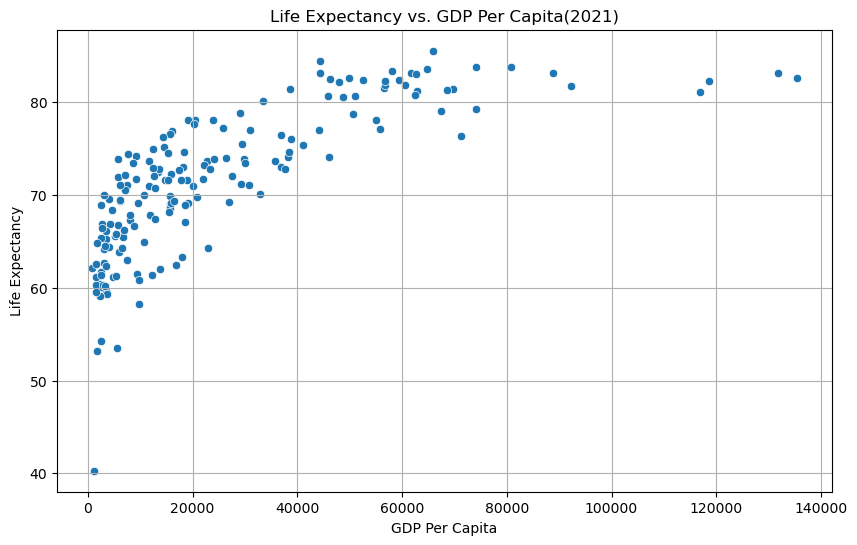

In [86]:
plt.figure(figsize=(10, 6))
sns.scatterplot(data = gdp_le_2021, x='GDP_Per_Capita', y='Life_Expectancy')
plt.title('Life Expectancy vs. GDP Per Capita(2021)')
plt.xlabel('GDP Per Capita')
plt.ylabel('Life Expectancy')
plt.grid(True)
plt.show()

**Q28: Find the correlation between Life Expectancy and GDP per Capita for the year 2021. What is the meaning of this number?**

**Comment**: A correlation of 0.75 suggests that as GDP per Capita increases, Life Expectancy tends to increase as well. This implies that wealthier economies, which have a higher GDP per Capita, often provide better living conditions including healthcare, and resources that contribute to longer life spans.

In [87]:
correlation = gdp_le_2021[['Life_Expectancy', 'GDP_Per_Capita']].corr().iloc[0, 1]
print(f"The correlation between Life Expectancy and GDP per Capita for the year 2021 is: {correlation}")

The correlation between Life Expectancy and GDP per Capita for the year 2021 is: 0.7527849922698688


**Q29: Add a column to gdp_le_2021 and calculate the logarithm of GDP per capita. Find the correlation between the log of GDP per capita and life expectancy. How does this compare to the calculation in the previous part? Look at a scatter plot to see if the result of this calculation makes sense.**

**Comment**: In this analysis, I found a linear correlation between life expectancy and the logarithm of GDP per capita, which supports the earlier findings that indicate a positive relationship between increased GDP per capita and life expectancy.

The correlation between Life Expectancy and Log of GDP per Capita for the year 2021 is: 0.8490647859477234


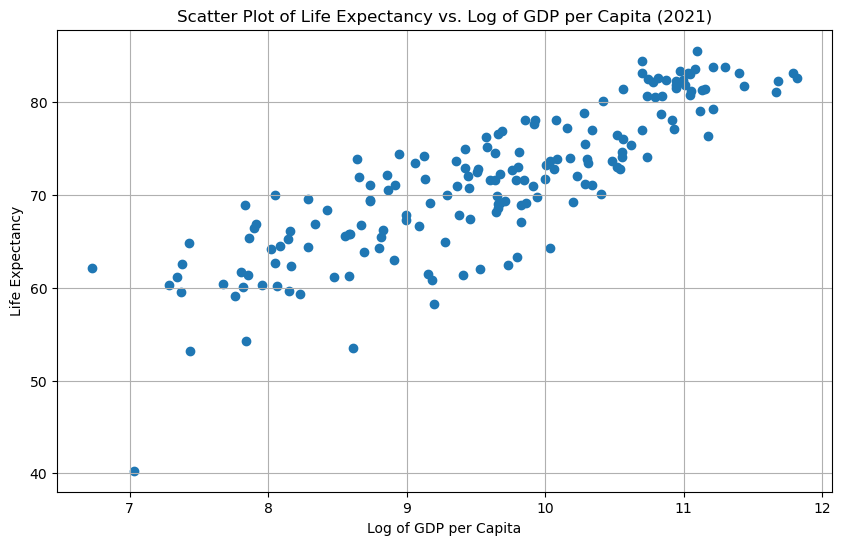

In [88]:
gdp_le_2021.loc[:, 'Log_GDP_Per_Capita'] = np.log(gdp_le_2021['GDP_Per_Capita'])
correlation_log = gdp_le_2021[['Life_Expectancy', 'Log_GDP_Per_Capita']].corr().iloc[0, 1]
print(f"The correlation between Life Expectancy and Log of GDP per Capita for the year 2021 is: {correlation_log}")

plt.figure(figsize=(10, 6))
plt.scatter(gdp_le_2021['Log_GDP_Per_Capita'], gdp_le_2021['Life_Expectancy'])
plt.title('Scatter Plot of Life Expectancy vs. Log of GDP per Capita (2021)')
plt.xlabel('Log of GDP per Capita')
plt.ylabel('Life Expectancy')
plt.grid(True)
plt.show() 
